# TP: Machine Learning (SIA_3611)

## TP2: Classification (4h) 

by Clément Bouvier 

In machine learning, classification is related to supervised learning approaches in which the algorithm fits from an annotated set of data. This learning phase is followed by a validation phase to evaluate the classification model through several metrics. Once the model is correctly validated, a generalization phase is used to classify new data.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP2 is to visualize feature space and try to predict the development of countries.

**Objectives:**
- Visualize the feature space
- Discuss the feasibility of feature space separation
- Normalize the datasets
- Train a K-NN, a decision tree, a random forest and a SVM
- Visualize the decision boundary for each method
- Create a test dataset
- Compute AUC scores on a evaluation dataset
- Tune hyperparameters
- Visualize the modification of decision boundary for each tuning
- Discuss the limits of the four implementations


## STEP 1: Feature space visualization

You will work on the WHO dataset in the year 2000. This first step consists of choosing two features to perform a classification.

**TO DO 1.1**

Execute the following cells

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

df = pd.read_csv("C:\\Users\\hp\\Desktop\\3A-SIA\\ML\Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2000)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles             

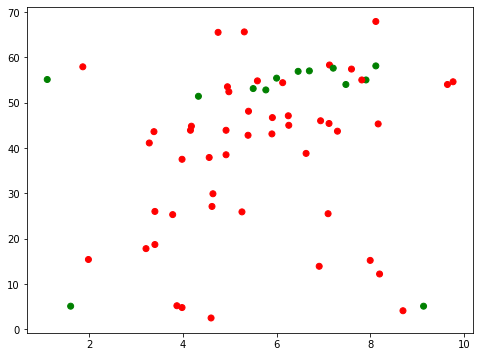

In [51]:
df_X = df1[['Total_expenditure', 'BMI']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.figure(figsize=(8, 6))
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))

**QUESTION 1**

Why was the label status binarized?

Is this feature space easily separable? Justify your response

**TO CODE 1.2**

Plot Total expenditure against Schooling

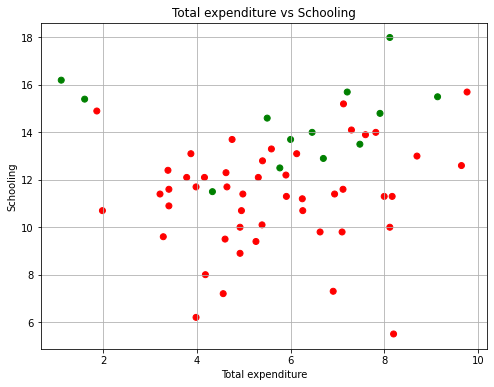

In [53]:
# Create a scatter plot of Total expenditure against Schooling
plt.figure(figsize=(8, 6))
plt.scatter(df1['Total_expenditure'], df1['Schooling'], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.xlabel('Total expenditure')
plt.ylabel('Schooling')
plt.title('Total expenditure vs Schooling')
plt.grid(True)
plt.show()

**TO CODE 1.3**

Plot Life Expectancy against Schooling

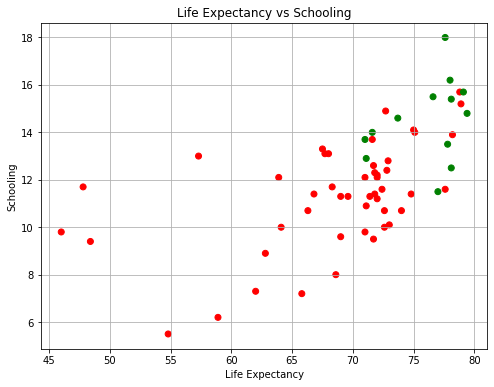

In [54]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df1['Life_expectancy'], df1['Schooling'], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.xlabel('Life Expectancy')
plt.ylabel('Schooling')
plt.title('Life Expectancy vs Schooling')
plt.grid(True)
plt.show()

df_X = df1[['Life_expectancy', 'Schooling']]
df_Status = df1[['Status']]

**QUESTION 2**

What would be the best features to use? Justify your response

## STEP 2: Dataset normalization

To classify, the values in the learning dataset must be normalized (aka between 0 and 1). This normalization can be performed through various ways.

**TO CODE 2.1**

Normalize df_X. This normalization should perfectly frame the data (aka the minimum and the maximum values of each feature should be respectively 0 and 1).

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on df_X
df_X_norm = scaler.fit_transform(df_X)

# Create a new DataFrame with the normalized data
df_X_norm = pd.DataFrame(df_X_norm, columns=df_X.columns)

# Verify the result
print(df_X_norm.describe())


       Life_expectancy  Schooling
count        61.000000  61.000000
mean          0.724551   0.518820
std           0.223784   0.197725
min           0.000000   0.000000
25%           0.658683   0.416000
50%           0.769461   0.528000
75%           0.862275   0.656000
max           1.000000   1.000000


**TO DO 2.2**

Each following cell performs a learning step and an AUC scores computation. For each classifier, several parameters have been chosen.

0.9294871794871794


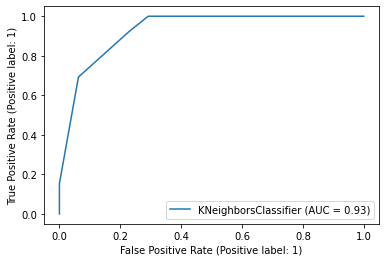

In [56]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

np_X_norm = df_X_norm.to_numpy()
np_Y = df_Y.to_numpy()
np_Y = np_Y.ravel()
clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(np_X_norm, np_Y)

np_Y_pred = clf1.predict_proba(np_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf1, np_X_norm, np_Y)
plt.show()

0.9198717948717949


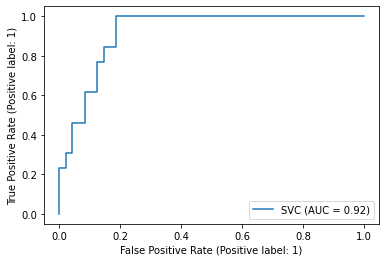

In [57]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='linear',probability=True)
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(np_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf2, np_X_norm, np_Y)
plt.show()

0.9799679487179488


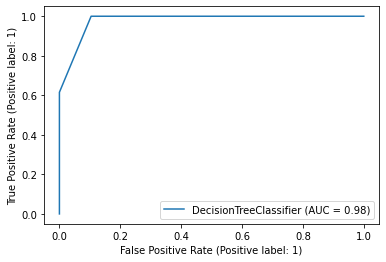

In [58]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(df_X_norm)

print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf3, np_X_norm, np_Y)
plt.show()

0.9855769230769231


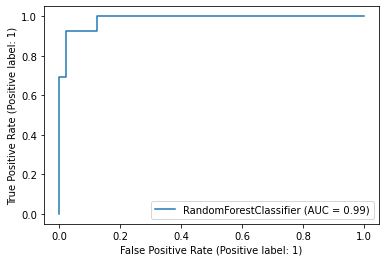

In [64]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(df_X_norm)
print(roc_auc_score(np_Y, np_Y_pred[:,1]))
plot_roc_curve(clf4, np_X_norm, np_Y)
plt.show()

**QUESTION 3**

Identify each used classifiers and specify the used parameters

Describe and explain the results obtained for each ROC curve. What is the relation between the AUC and the ROC curve ? According to the ROC curve, which model is the best if we want to maximize the sensitivity ? And if we want to maximize the specificity ? Compare those results with the AUC. 

### Parameters 
    
* KNeighborsClassifier
    {n_neighbors=5}
* SVM
    {C=2.0, kernel='linear',probability=True}
* DecisionTreeClassifier
    {max_depth=3}
* RandomForestClassifier 
    {n_estimators=100, max_depth=3}
* 

    ### Best model to maximize the sensitivity
    
* Rate TP = sensibility = TP/(TP+ FN)
* Rate precision = TP/(TP+ FP)
* Rate specificity = TN/(TN+TN)
* AxeY = sensibility = TP
* AxeX = 1 - specificity = FP

Referring to the ROC curve and the following formulas noted during the Tp, to maximize the sensitivity, RandomForestClassifier is the best model
* 
    ### Best model to maximize the specificity
    
Referring to the ROC curve and the following formulas noted during the Tp, to maximize the sensitivity, DecisionTreeClassifier is the best model

We notice that with maximization of sensitivity, we have an AUC of 0.99 and for maximization of specificity, we have an AUC of 0.98. Yes, we don't have a big difference because in both cases, we have a speed of maximizing sensitivity.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

For a two-classes problem, a decision boundary is a hypersurface which splits the feature space between two sets (for each class). Then this surface is composed of all the equiprobability points in the feature space.

**TO DO 2.3**

Plot the decision boundary with df_X for each classifiers

<module 'matplotlib.pyplot' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

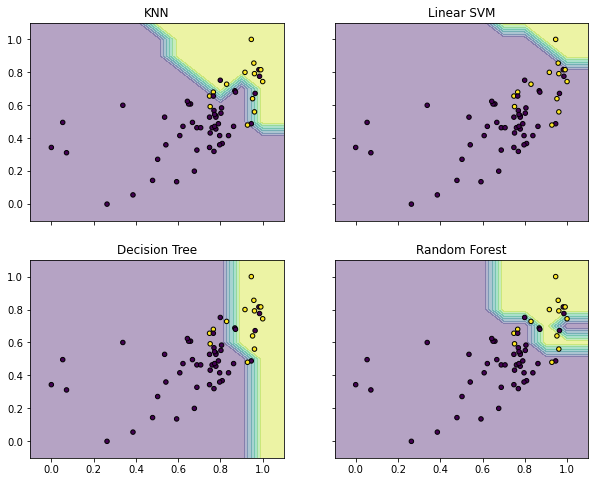

In [10]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 4**

What is the main problem of the classification step with this dataset?

In your opinion, which classifier is better suited for this classification task? Justify your response

## STEP 3: Biases correction and model tuning

In this part, you will focus on improving the AUC scores of the four methods.

Firstable, you will weigh the classes to balance the classifier response. Then you will tune various hyperparameters.

**TO CODE 3.1**

Compute the percentage of "Developed" class against the size the np_Y.

In [11]:
# Calculate the percentage of "Developed" class in np_Y
percentage_of_developed = ((np_Y == 1).sum() / len(np_Y)) * 100

print(f"Percentage of 'Developed' class: {percentage_of_developed:.2f}%")


Percentage of 'Developed' class: 21.31%


SVM, Decision Tree and Random Forest algorithms have a parameter named:

```
class_weight
```
Here is a extract from sklearn documentation:

**class_weight** dict, list of dict or “balanced”, default=None

Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.


**QUESTION 5**

What would be the weight values for each class?

**TO CODE 3.2**

Balance SVM, Decision Tree and Random Forest classifiers and plot the decision boundaries

<module 'matplotlib.pyplot' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

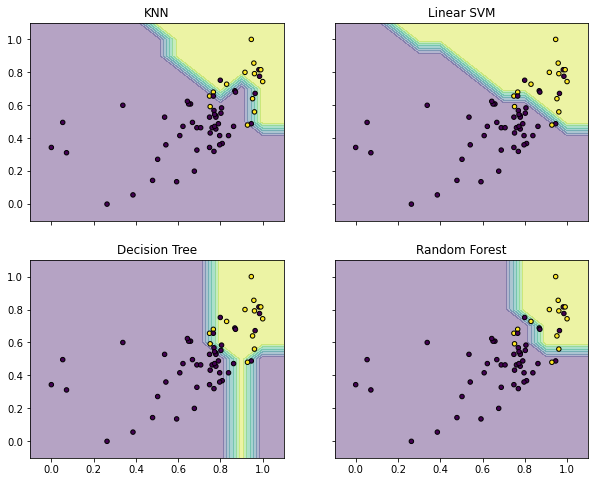

In [16]:
from itertools import product


clf2 = SVC(class_weight="balanced", C=2.0, kernel='linear',probability=True)
clf2.fit(np_X_norm, np_Y)

clf3 = DecisionTreeClassifier(class_weight="balanced", max_depth=3)
clf3.fit(np_X_norm, np_Y)

clf4 = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth=3)
clf4.fit(np_X_norm, np_Y)

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))



for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt





**TO CODE 3.3**

Compute the new AUC scores

SVM AUC:  0.9182692307692308
Decision tree AUC:  0.9423076923076923
Random forest AUC:  0.985576923076923


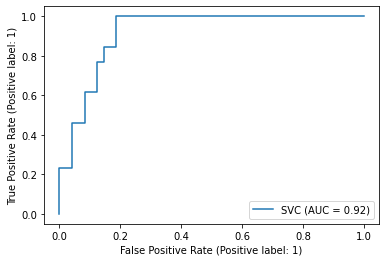

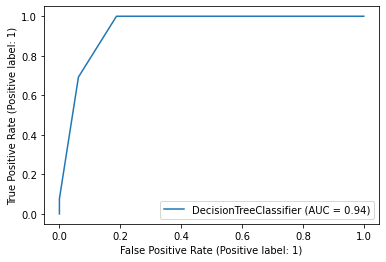

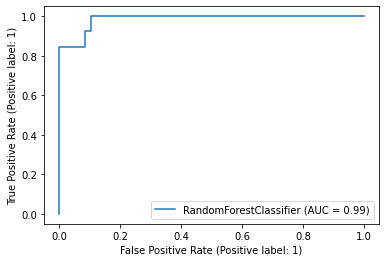

In [17]:
np_Y_pred = clf2.predict_proba(df_X_norm)
print('SVM AUC: ',roc_auc_score(np_Y, np_Y_pred[:,1]))

np_Y_pred = clf3.predict_proba(df_X_norm)
print('Decision tree AUC: ',roc_auc_score(np_Y, np_Y_pred[:,1]))

np_Y_pred = clf4.predict_proba(df_X_norm)
print('Random forest AUC: ',roc_auc_score(np_Y, np_Y_pred[:,1]))

#plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))
plot_roc_curve(clf2, np_X_norm, np_Y)
plot_roc_curve(clf3, np_X_norm, np_Y)
plot_roc_curve(clf4, np_X_norm, np_Y)
plt.show()

**QUESTION 6**

Why did the AUC scores increase? How do you interpret it?

In your opinion, has the classe balance improved the classification?


Let's focus on the SVM classifier.

Sklearn allows multiple kernels.

Here is an extract of the documentation:

**kernel** {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).


**TO CODE 3.4**

Test the gaussian and the polynomial kernels with balanced classes and plot the decision boundaries

<module 'matplotlib.pyplot' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

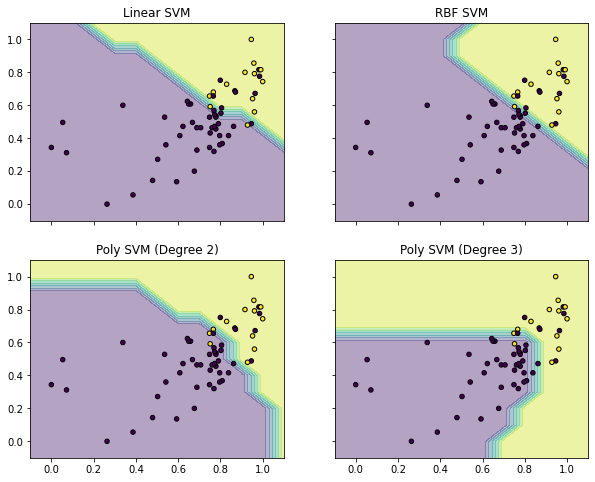

In [18]:
from itertools import product


clf5 = SVC(class_weight="balanced", kernel='linear', probability=True)
clf5.fit(np_X_norm, np_Y)

clf6 = SVC(class_weight="balanced", kernel='rbf', probability=True)
clf6.fit(np_X_norm, np_Y)

clf7 = SVC(class_weight="balanced", kernel='poly', degree=2, probability=True)
clf7.fit(np_X_norm, np_Y)

clf8 = SVC(class_weight="balanced", kernel='poly', degree=3, probability=True)
clf8.fit(np_X_norm, np_Y)

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))



for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf5, clf6, clf7, clf8],
                        ['Linear SVM', 'RBF SVM', 'Poly SVM (Degree 2)', 'Poly SVM (Degree 3)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 7**

In your opinion, which is the best kernel for this dataset? Justify your response

Linear SVM:  0.9198717948717949
RBF SVM:  0.9166666666666666
Poly SVM (Degree 2):  0.9198717948717949
Poly SVM (Degree 3):  0.9158653846153847


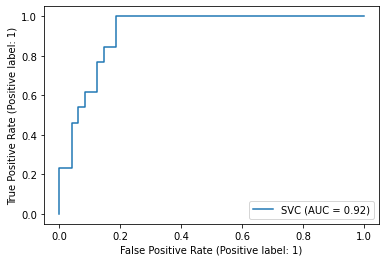

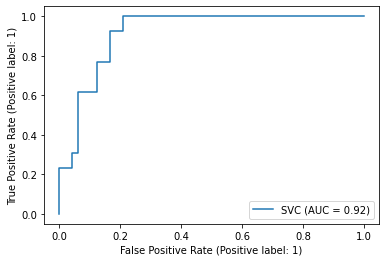

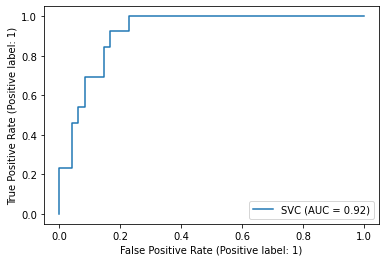

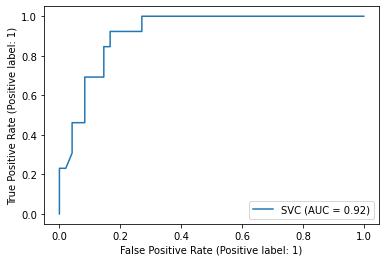

In [21]:
np_Y_pred = clf5.predict_proba(df_X_norm)
print('Linear SVM: ',roc_auc_score(np_Y, np_Y_pred[:,1]))

np_Y_pred = clf6.predict_proba(df_X_norm)
print('RBF SVM: ',roc_auc_score(np_Y, np_Y_pred[:,1]))

np_Y_pred = clf7.predict_proba(df_X_norm)
print('Poly SVM (Degree 2): ',roc_auc_score(np_Y, np_Y_pred[:,1]))

np_Y_pred = clf8.predict_proba(df_X_norm)
print('Poly SVM (Degree 3): ',roc_auc_score(np_Y, np_Y_pred[:,1]))

#plt.subplots(3, 2, sharex='col', sharey='row', figsize=(10, 8))
plot_roc_curve(clf5, np_X_norm, np_Y)
plot_roc_curve(clf6, np_X_norm, np_Y)
plot_roc_curve(clf7, np_X_norm, np_Y)
plot_roc_curve(clf8, np_X_norm, np_Y)
plt.show()


In this part, by comparing the AUCs of the different kernels used, namely: 'linear', 'rbf', 'poly', degree=2, 'poly', degree=3, we obtain the same AUC 0.92 so we do not have a big difference in the choice of kernel for SVM.

**BONUS**

Tune the parameters for Decision Tree and Random Forest algorithms and plot the decision boundaries

In [22]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform Grid Search for Decision Tree
grid_search_dt = GridSearchCV(dt_classifier, param_grid=param_grid_dt, cv=5, scoring='roc_auc')
grid_search_dt.fit(np_X_norm, np_Y)

# Print best hyperparameters
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# Define hyperparameter distributions for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform Randomized Search for Random Forest
random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='roc_auc')
random_search_rf.fit(np_X_norm, np_Y)

# Print best hyperparameters
print("Best hyperparameters for Random Forest:", random_search_rf.best_params_)


Best hyperparameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}


## STEP 4: An evaluation dataset

This part is to test the generalization of your models.

You trained several classifiers on two features extracted from the year 2000.

**TO CODE 4.1**

Apply your models on the year 2012

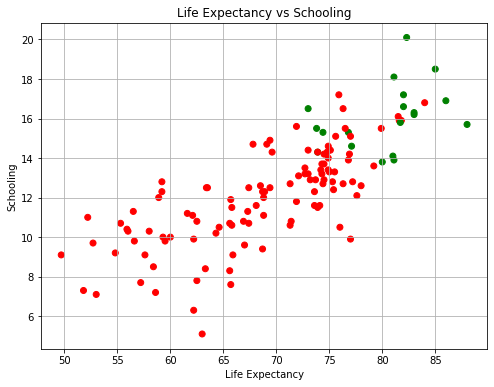

In [33]:
df_2012 = df[(df.Year == 2012)]
df_X_2012 = df_2012[['Life_expectancy', 'Schooling']]
df_Status_2012 = df_2012[['Status']]

df_Y_2012 = df_Status_2012.replace(['Developing', 'Developed'], [0, 1])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_2012['Life_expectancy'], df_2012['Schooling'], c=np.squeeze(df_Y_2012.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.xlabel('Life Expectancy')
plt.ylabel('Schooling')
plt.title('Life Expectancy vs Schooling')
plt.grid(True)
plt.show()

In [40]:
# Normalize or preprocess the 2012 data (e.g., using Min-Max scaling)
scaler = MinMaxScaler()
df_X_2012_norm = scaler.fit_transform(df_X_2012)

# Create a new DataFrame with the normalized data

df_X_2012_norm = pd.DataFrame(df_X_2012_norm, columns=df_X_2012.columns)

# Verify the result
print(df_X_2012_norm)

     Life_expectancy  Schooling
0           0.255875   0.313333
1           0.710183   0.606667
2           0.663185   0.620000
3           0.164491   0.346667
4           0.684073   0.806667
..               ...        ...
124         0.699739   0.693333
125         0.498695   0.460000
126         0.566580   0.380000
127         0.248042   0.480000
128         0.180157   0.313333

[129 rows x 2 columns]


In [43]:
# Create a Decision Tree classifier with the best hyperparameters
dt_classifier = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1
)

# Train the Decision Tree classifier on the normalized training data
dt_classifier.fit(np_X_norm, np_Y)

# Create a Random Forest classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto'
)

# Train the Random Forest classifier on the normalized training data
rf_classifier.fit(np_X_norm, np_Y)

# Apply Decision Tree and Random Forest to the 2012 data
predictions_dt_2012 = dt_classifier.predict_proba(df_X_2012_norm)
predictions_rf_2012 = rf_classifier.predict_proba(df_X_2012_norm)

np_Y_2012 = df_Y_2012.to_numpy()
np_Y_2012 = np_Y_2012.ravel()

# Calculate ROC AUC scores for Decision Tree and Random Forest on the 2012 data
roc_auc_dt_2012 = roc_auc_score(np_Y_2012, predictions_dt_2012[:, 1])
roc_auc_rf_2012 = roc_auc_score(np_Y_2012, predictions_rf_2012[:, 1])

# Print or store the ROC AUC scores for evaluation
print("Decision Tree ROC AUC on 2012 data:", roc_auc_dt_2012)
print("Random Forest ROC AUC on 2012 data:", roc_auc_rf_2012)


Decision Tree ROC AUC on 2012 data: 0.812200956937799
Random Forest ROC AUC on 2012 data: 0.933732057416268


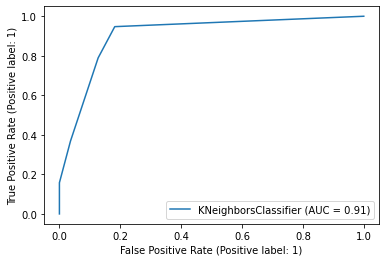

KNN ROC AUC on 2012 data: 0.9062200956937798


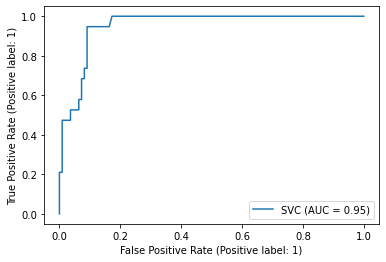

SVM ROC AUC on 2012 data: 0.9523923444976077


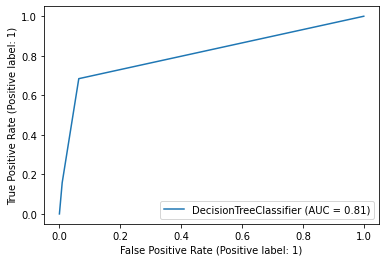

Decision Tree ROC AUC on 2012 data: 0.812200956937799


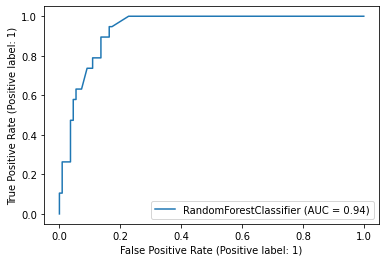

Random Forest ROC AUC on 2012 data: 0.9354066985645934


In [66]:
# Apply the KNN model to the 2012 data
predictions_knn_2012 = clf1.predict_proba(df_X_2012_norm)  # Assuming clf1 is your trained KNN model

# Calculate ROC AUC score for KNN on the 2012 data
roc_auc_knn_2012 = roc_auc_score(np_Y_2012, predictions_knn_2012[:, 1])

# Plot the ROC curve for KNN
plot_roc_curve(clf1, df_X_2012_norm, np_Y_2012)
plt.show()

# Print the ROC AUC score for KNN
print("KNN ROC AUC on 2012 data:", roc_auc_knn_2012)

# Assuming you have already loaded and preprocessed the 2012 data and normalized it as df_2012_norm
# You also have the true labels for the 2012 data as true_labels_2012

# Apply the SVM model to the 2012 data
predictions_svm_2012 = clf2.predict_proba(df_X_2012_norm)  # Assuming clf2 is your trained SVM model

# Calculate ROC AUC score for SVM on the 2012 data
roc_auc_svm_2012 = roc_auc_score(np_Y_2012, predictions_svm_2012[:, 1])

# Plot the ROC curve for SVM
plot_roc_curve(clf2, df_X_2012_norm, np_Y_2012)
plt.show()

# Print the ROC AUC score for SVM
print("SVM ROC AUC on 2012 data:", roc_auc_svm_2012)

# Create a Decision Tree classifier
#clf3 = DecisionTreeClassifier(max_depth=3)

# Train the Decision Tree model on the 2000 data
#clf3.fit(np_X_norm, np_Y)

# Apply the Decision Tree model to the 2012 data
predictions_dt_2012 = clf3.predict_proba(df_X_2012_norm)

np_Y_2012 = df_Y_2012.to_numpy()
np_Y_2012 = np_Y_2012.ravel()

# Calculate ROC AUC score for Decision Tree on the 2012 data
roc_auc_dt_2012 = roc_auc_score(np_Y_2012, predictions_dt_2012[:, 1])

# Plot the ROC curve for Decision Tree
plot_roc_curve(clf3, df_X_2012_norm, np_Y_2012)
plt.show()

# Print the ROC AUC score for Decision Tree
print("Decision Tree ROC AUC on 2012 data:", roc_auc_dt_2012)

# Create a Random Forest classifier
#clf4 = RandomForestClassifier(n_estimators=300, max_depth=30)

# Train the Random Forest model on the 2000 data
#clf4.fit(np_X_norm, np_Y)

# Apply the Random Forest model to the 2012 data
predictions_rf_2012 = clf4.predict_proba(df_X_2012_norm)

# Calculate ROC AUC score for Random Forest on the 2012 data
roc_auc_rf_2012 = roc_auc_score(np_Y_2012, predictions_rf_2012[:, 1])

# Plot the ROC curve for Random Forest
plot_roc_curve(clf4, df_X_2012_norm, np_Y_2012)
plt.show()

# Print the ROC AUC score for Random Forest
print("Random Forest ROC AUC on 2012 data:", roc_auc_rf_2012)

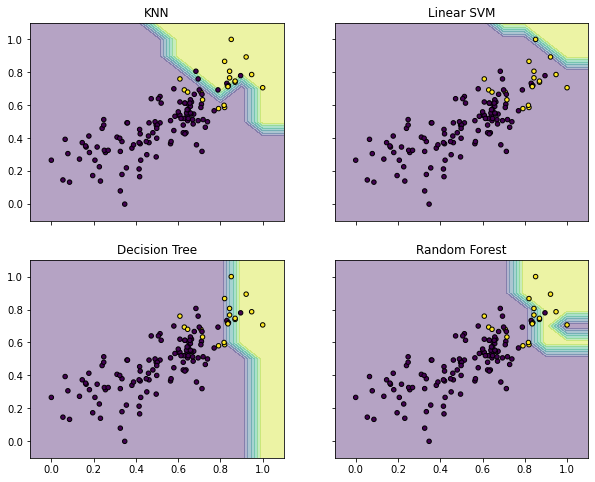

In [68]:
x_min, x_max = df_X_2012_norm.iloc[:, 0].min() - 0.1, df_X_2012_norm.iloc[:, 0].max() + 0.1
y_min, y_max = df_X_2012_norm.iloc[:, 1].min() - 0.1, df_X_2012_norm.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(df_X_2012_norm.iloc[:, 0], df_X_2012_norm.iloc[:, 1], c=np_Y_2012,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()


**QUESTION 8**

Are your models still relevant in the year 2012?